# GaussianProcessClassifier

## Data preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data/card_transdata.csv")

In [4]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


*data description*:
- distance_from_home - расстояние от дома, где произошла транзакция (the distance from home where the transaction happened.)

- distance_from_last_transaction - расстояние от места, где произошла последняя транзакция (the distance from last transaction happened.)

- ratio_to_median_purchase_price - соотношение стоимости покупки в транзакции от медианной стоимости покупки (Ratio of purchased price transaction to median purchase price.)

- repeat_retailer -  совешена ли тразакция у того же (то есть **не** новый продавец) продавца (Is the transaction happened from same retailer.)

- used_chip - посредством ли чипа (карты) транзация (Is the transaction through chip (credit card).)

- used_pin_number - использовали ли пинкод при совершении транзакции (Is the transaction happened by using PIN number.)

- online_order - является ли транзакция онлайн заказом (Is the transaction an online order.)

- fraud - является ли транзакция мошеннической (Is the transaction fraudulent.)




In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
data.duplicated().sum()

0

**Выводы:**
- наблюдаем отсутствие пропущенных значений в данных

- все признаки имеют тип float64, хотя не всем он нужен, таким как булевым: repeat_retailer, used_chip, used_pin_number, online_order и  fraud - целевой. Но менять тип на **bool** у признаков не будем, поскольку машинным алгоритмам в числовом представлении признаков, просто далее будем иметь в виду, что это **бинарные** признаки, максимум можем сменить тип данных на **int**.

- как видим дубликатов нет. 

In [15]:
bool_group = {'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'}

for feature in bool_group: data[feature] = data[feature].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


## Visualisation

array([[<AxesSubplot: title={'center': 'distance_from_home'}>,
        <AxesSubplot: title={'center': 'distance_from_last_transaction'}>,
        <AxesSubplot: title={'center': 'ratio_to_median_purchase_price'}>],
       [<AxesSubplot: title={'center': 'repeat_retailer'}>,
        <AxesSubplot: title={'center': 'used_chip'}>,
        <AxesSubplot: title={'center': 'used_pin_number'}>],
       [<AxesSubplot: title={'center': 'online_order'}>,
        <AxesSubplot: title={'center': 'fraud'}>, <AxesSubplot: >]],
      dtype=object)

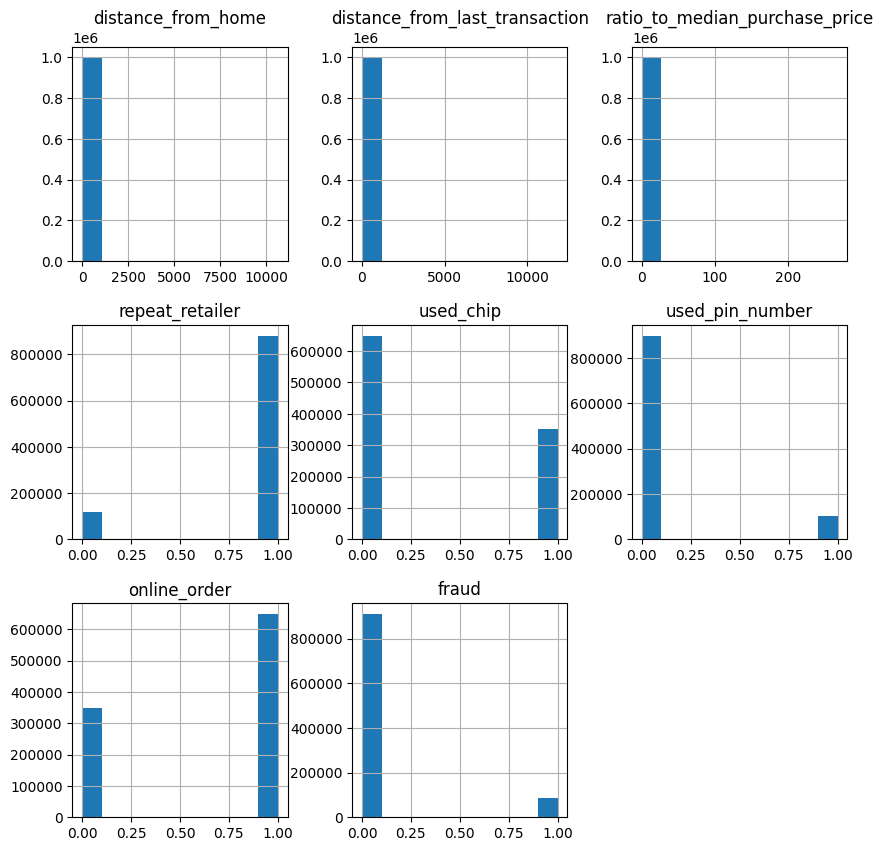

In [19]:
data.hist(figsize=(10,10))

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

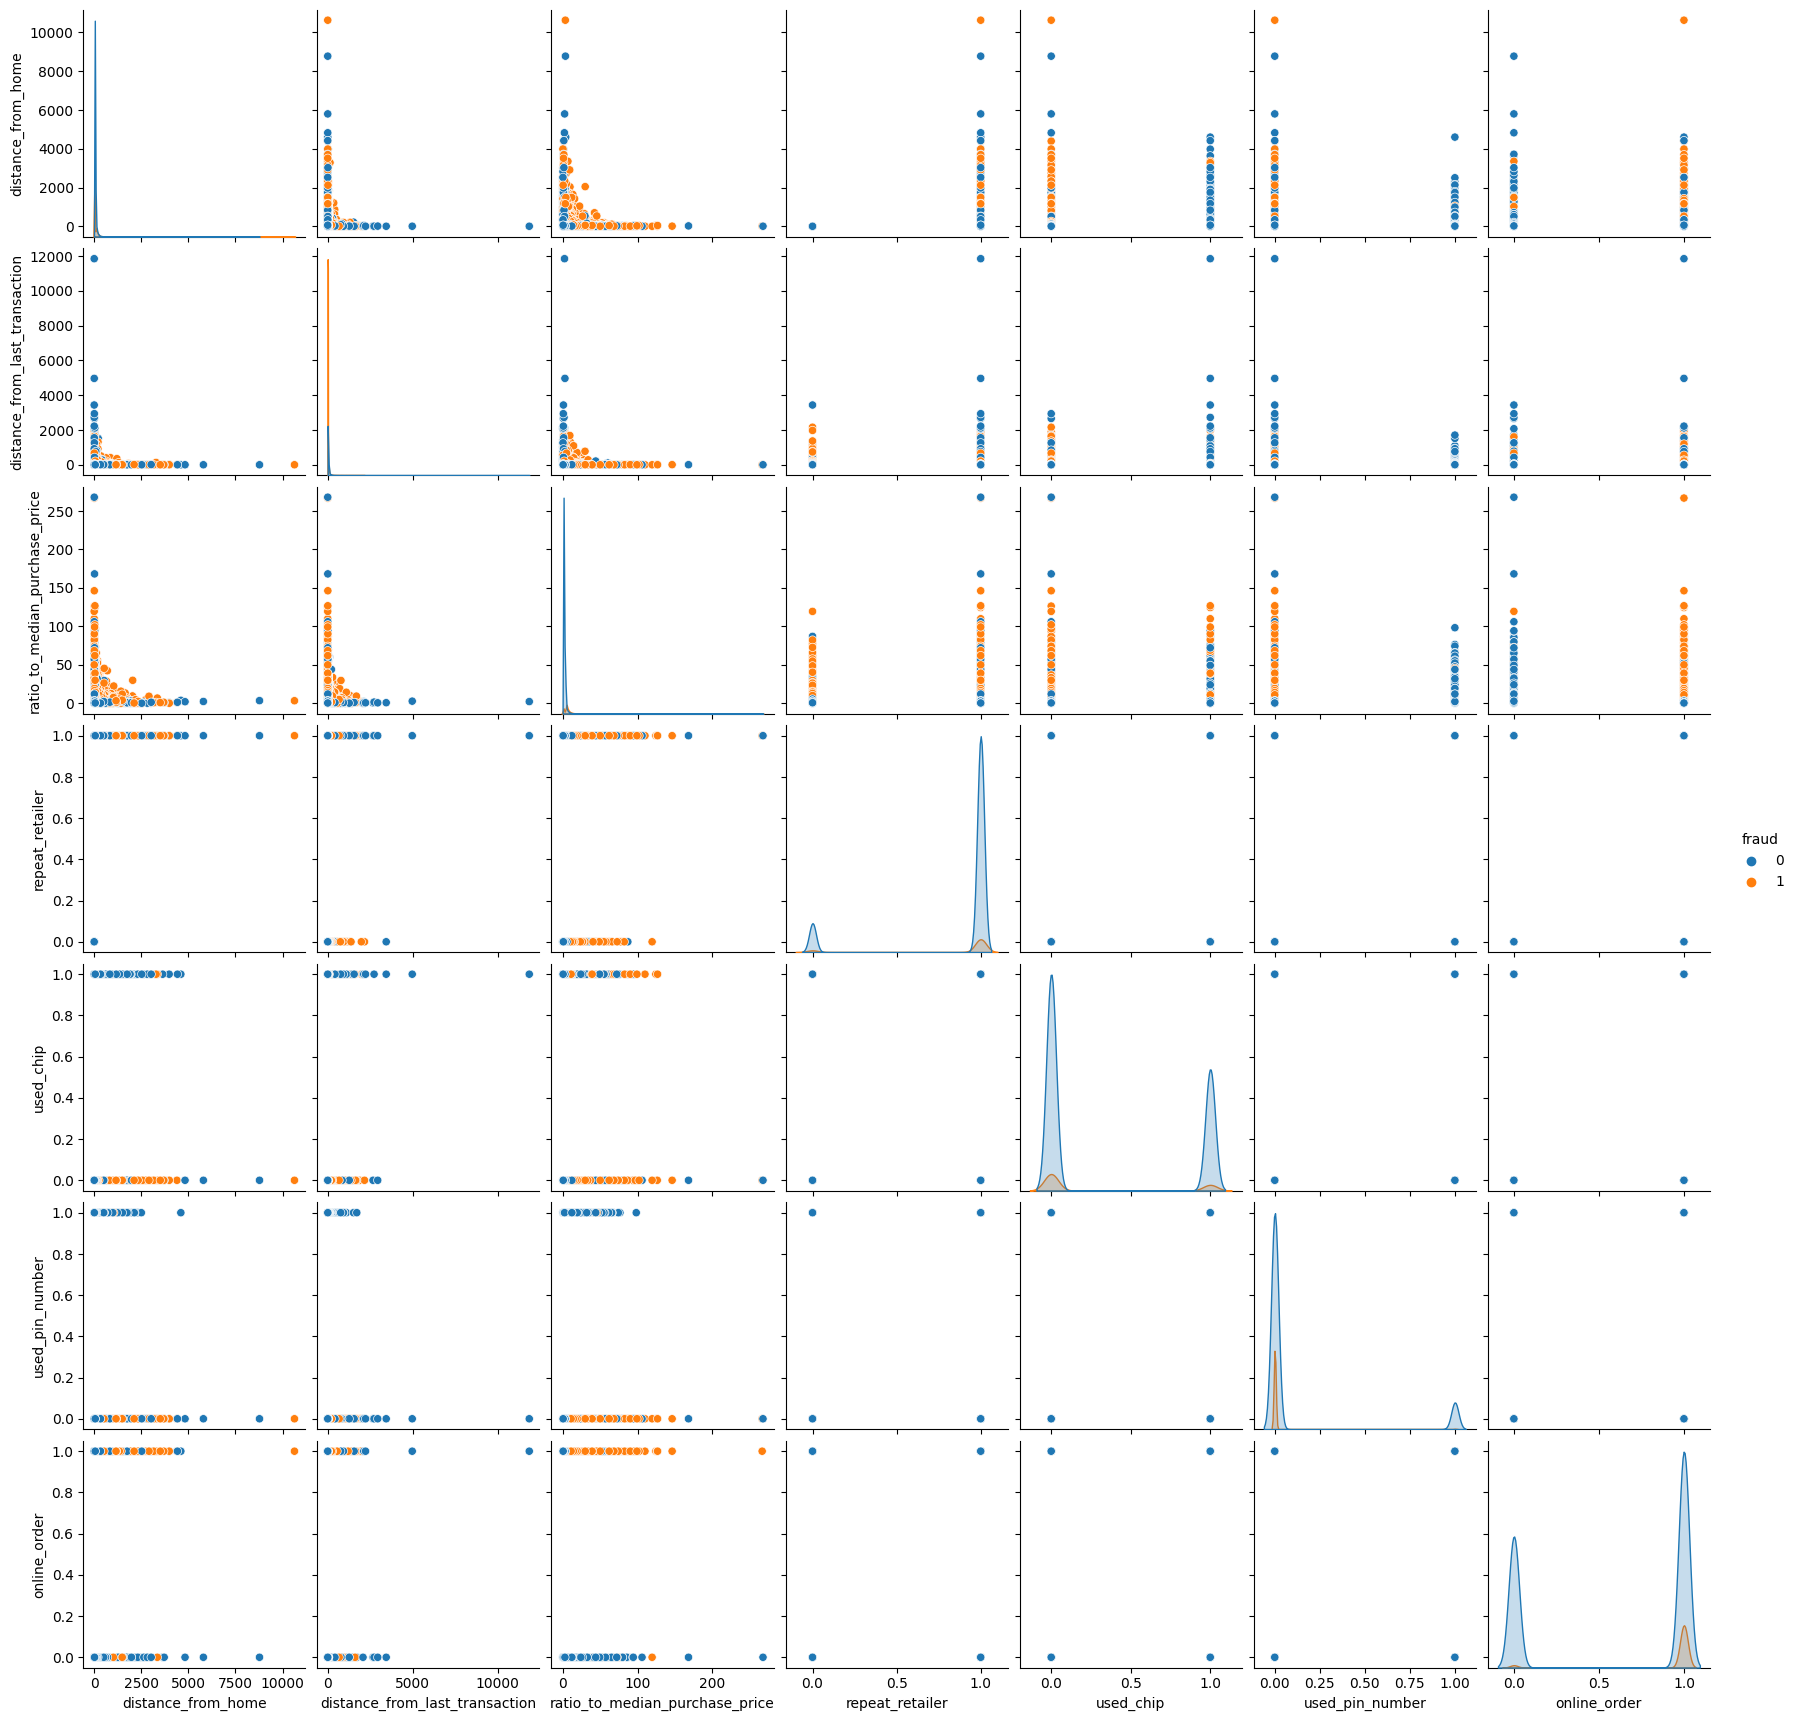

In [21]:
sns.pairplot(data, hue='fraud')